In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [6]:
df = pd.read_csv("carlifornia.csv")

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df.shape

(20640, 8)

In [10]:
df['target'] = 1000*dataset.target

In [12]:
df.isna().sum().sum()

0

In [13]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [21]:
def half_masked_corr_heatmap(dataframe,title=None,file=None):
    """
    dataframe: the refrence dataframe
    target: (string) column name of the target variable
    title: chart title
    file: pathfilename if you want to save image
    
    """
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(),mask=mask,annot=True,cmap='coolwarm')
    
    if title:
        plt.title(f"\n{title}",fontsize=18)
    
    if file:
        plt.savefig(file,bbox_inches='tight')
    
    return

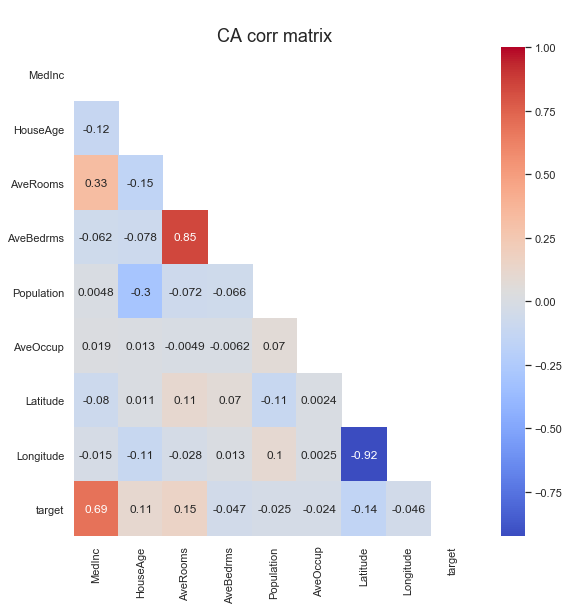

In [22]:
half_masked_corr_heatmap(df,"CA corr matrix")

In [36]:
def corr_to_target(dataframe,target,title=None,file=None):
    """
    dataframe: the refrence dataframe
    target: (string) column name of the target variable
    title: chart title
    file: pathfilename if you want to save image
    
    """
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target,ascending=False),
               annot=True,cmap='coolwarm')
    if title:
        plt.title(f"{title}",fontsize=18)
    if file:
        plt.savefig(file,bbox_inches='tight')
    return

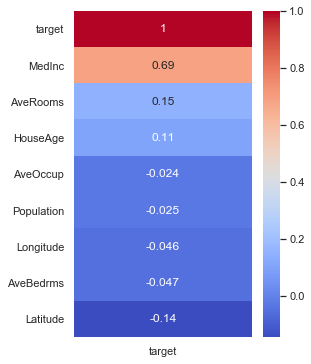

In [37]:
corr_to_target(df,'target')

In [83]:

def gen_scatterplots(dataframe,target_column,list_columns,cols=1,file=None):
    import math
    """
    dataframe: the refrence dataframe
    target_columns: (string) column name of the target variable
    list_columns: list of columns to be used for scatter ploting
    cols : Number of plot you like to see in a row
    file: pathfilename if you want to save image
    
    """
    
    rows      = math.ceil(len(list_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    fig,ax = plt.subplots(nrows  =rows,
                         ncols   =cols,
                         figsize =(figwidth,figheight))
    
    color_choices = ['blue','grey','goldenrod','r','black','darkorange','g']
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    ax = ax.ravel()
    
    for i,column in enumerate(list_columns):
        ax[i].scatter(dataframe[column],dataframe[target_column],
                     color = color_choices[i % len(color_choices)],
                     alpha = 0.25)
        ax[i].set_xlabel(f"{column}",fontsize=14)
        ax[i].set_ylabel(f"{target_column}",fontsize=14)
    
    fig.suptitle("\nScatter plot: Each feature vs Target",size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0,top=0.88)
    if file:
        plt.savefig(file,bbox_incehes='tight')
    plt.show()
    return

In [84]:
feature_col = [col for col in df.columns if col != 'target']

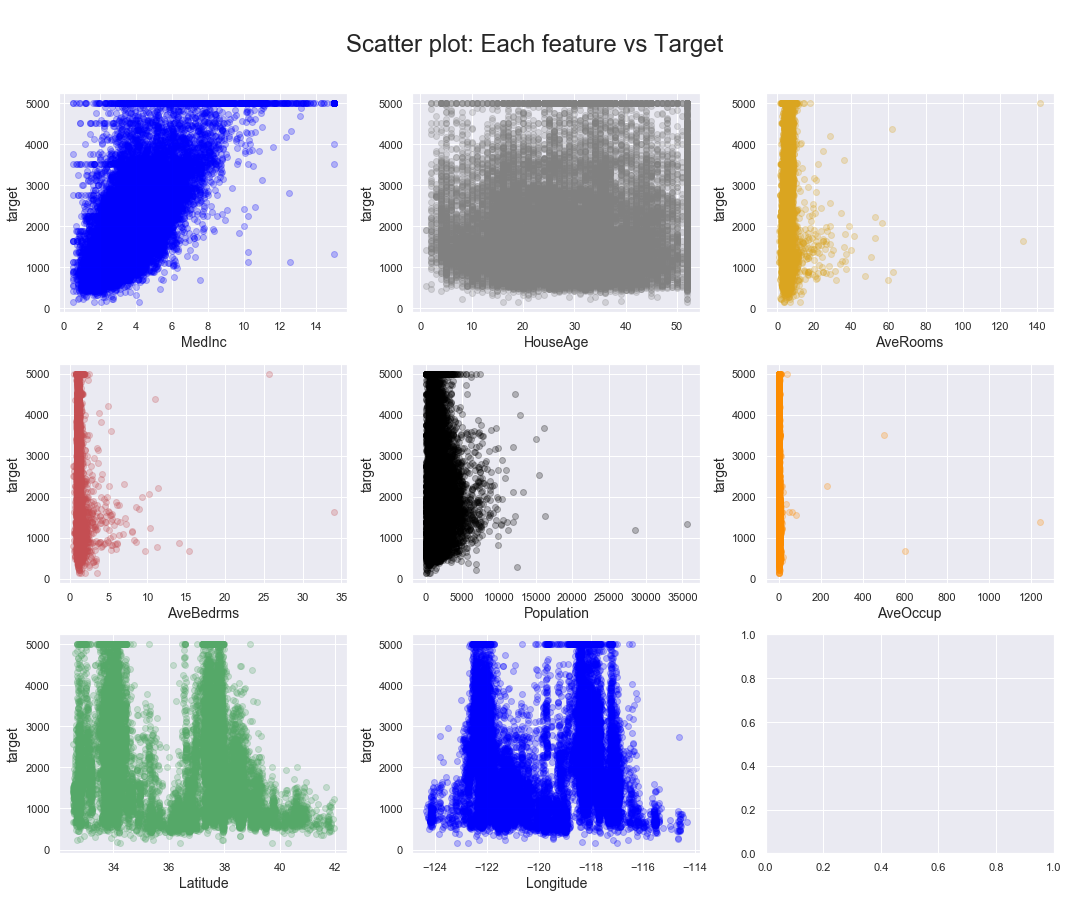

In [85]:
gen_scatterplots(df,'target',feature_col,3)

In [68]:
def gen_histograms(dataframe,bins=50,cols=1,file=None):
     
    """
    dataframe: the refrence dataframe
    cols : Number of plot you like to see in a row
    file: pathfilename if you want to save image
    
    """
    
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    fig,ax = plt.subplots(nrows  =rows,
                         ncols   =cols,
                         figsize =(figwidth,figheight))
    
    color_choices = ['blue','grey','goldenrod','r','black','darkorange','g']
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    ax = ax.ravel()
    
    for i,column in enumerate(dataframe.columns):
        ax[i].hist(dataframe[column],bins=50,color=color_choices[i % len(color_choices)],
                  alpha=1)
        ax[i].set_title(f"{dataframe[column].name}",fontsize=18)
        
    fig.suptitle("\nHistograms for all variables in Dataframe",size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0,top=0.88)
    if file:
        plt.savefig(file,bbox_inches='tight')
    plt.show()
    
    return

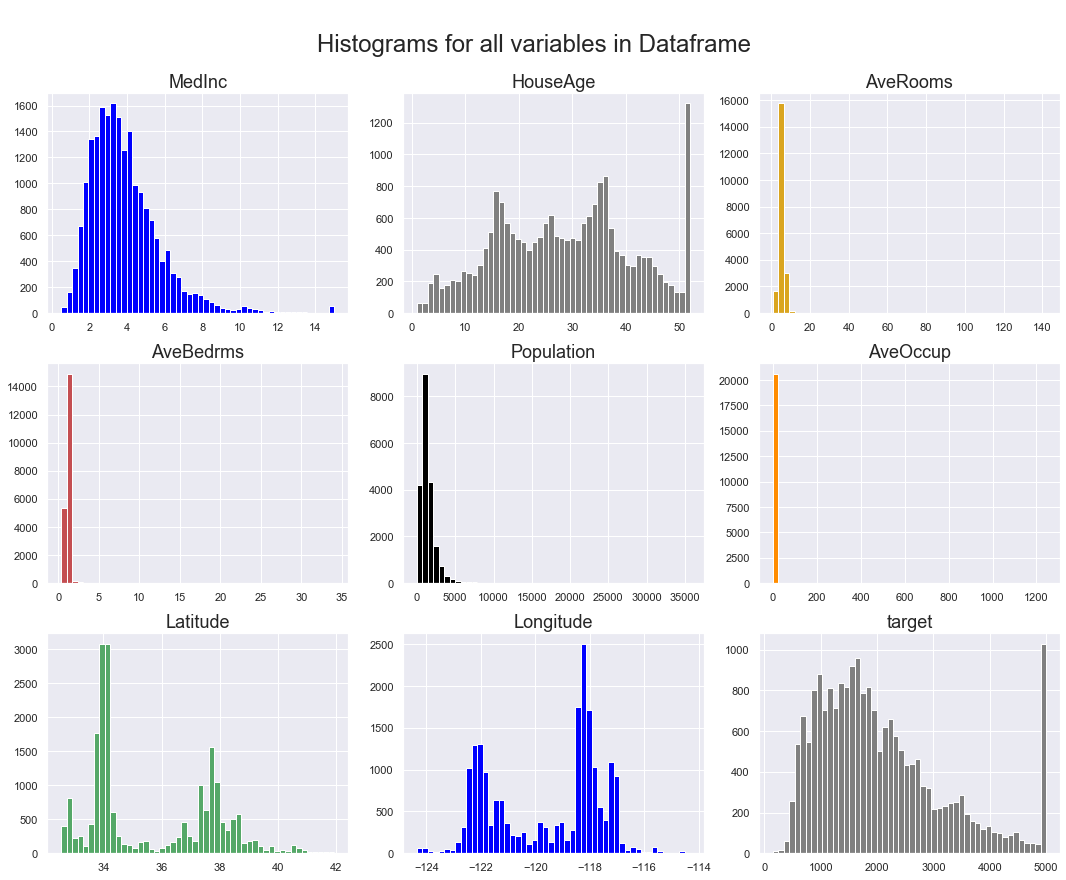

In [69]:
gen_histograms(df,bins=50,cols=3)

In [72]:
def gen_boxplots(dataframe,cols=1,file=None):
      
    """
    dataframe: the refrence dataframe
    cols : Number of plot you like to see in a row
    file: pathfilename if you want to save image
    
    """
    
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    fig,ax = plt.subplots(nrows  =rows,
                         ncols   =cols,
                         figsize =(figwidth,figheight))
    
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    ax = ax.ravel() # Ravel turns a matrix to a vector...easier to iterate
    
    for i,column in enumerate(dataframe.columns):
        ax[i].boxplot(dataframe[column])
        ax[i].set_title(f"{column}",fontsize=18)
        
    fig.suptitle("\nBoxplots for all variables in Dataframe",size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0,top=0.88)
    if file:
        plt.savefig(file,bbox_inches='tight')
    plt.show()
    
    return
    

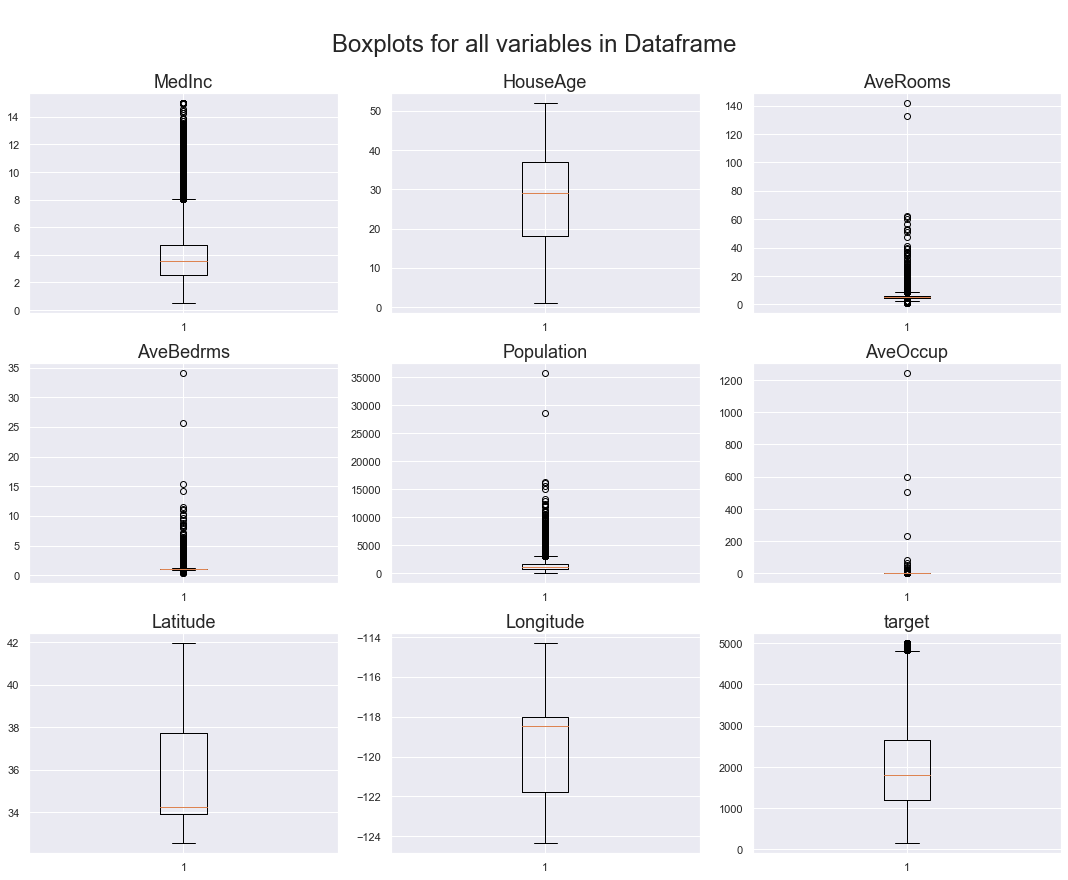

In [73]:
gen_boxplots(df,3)

In [76]:
def gen_linecharts(dataframe,cols=1,file=None):
      
    """
    dataframe: the refrence dataframe
    cols : Number of plot you like to see in a row
    file: pathfilename if you want to save image
    
    """
    
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    fig,ax = plt.subplots(nrows  =rows,
                         ncols   =cols,
                         figsize =(figwidth,figheight))
    
    color_choices = ['blue','grey','goldenrod','r','black','darkorange','g']
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    ax = ax.ravel() # Ravel turns a matrix to a vector...easier to iterate
    
    for i,column in enumerate(dataframe.columns):
        ax[i].plot(dataframe[column],color=color_choices[i%len(color_choices)])
        ax[i].set_title(f"{column}",fontsize=18)
        ax[i].set_ylabel(f"{column}",fontsize=14)
        
    fig.suptitle("\nLine Graphs for all variables in Dataframe",size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0,top=0.88)
    if file:
        plt.savefig(file,bbox_inches='tight')
    plt.show()
    
    return
    

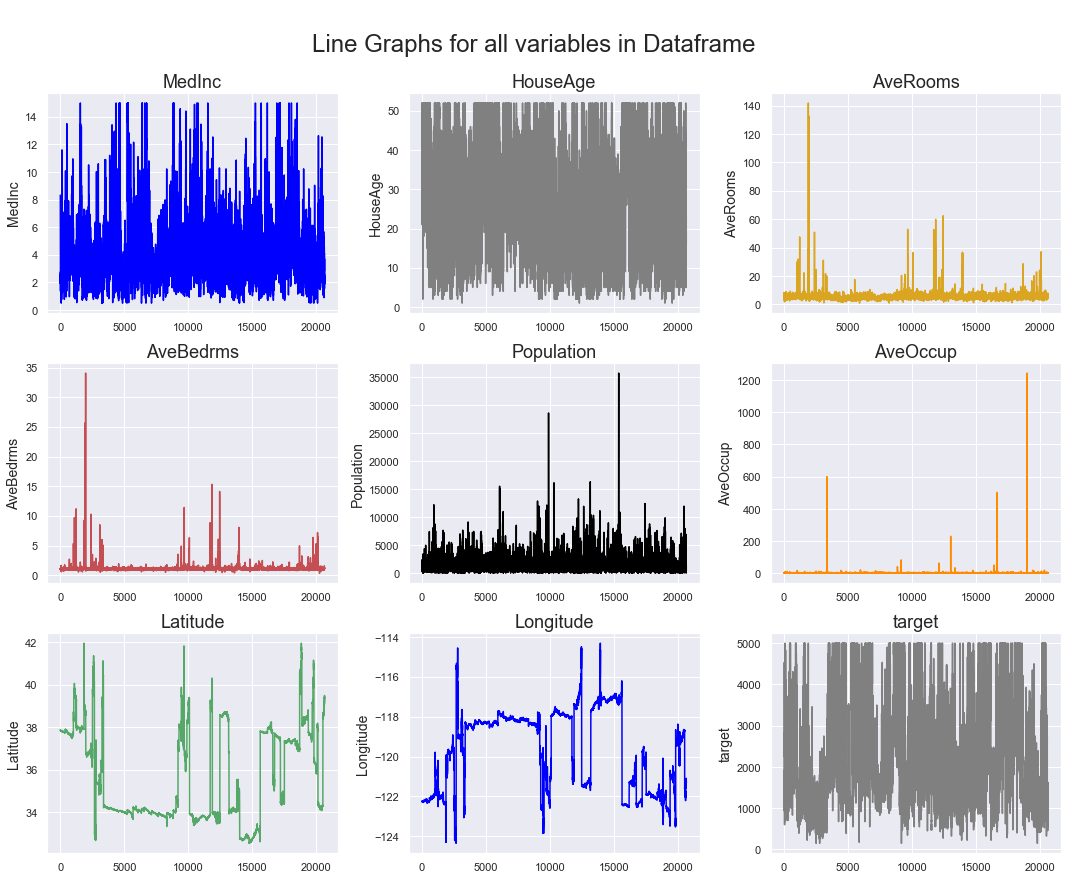

In [77]:
gen_linecharts(df,3)

In [78]:
def gen_linecharts_rolling(dataframe,roll_num,cols=1,file=None):
      
    """
    dataframe: the refrence dataframe
    cols : Number of plot you like to see in a row
    file: pathfilename if you want to save image
    
    """
    
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows
    
    dataframe = dataframe.rolling(roll_num).mean()
    
    fig,ax = plt.subplots(nrows  =rows,
                         ncols   =cols,
                         figsize =(figwidth,figheight))
    
    color_choices = ['blue','grey','goldenrod','r','black','darkorange','g']
    plt.subplots_adjust(wspace=0.3,hspace=0.3)
    ax = ax.ravel() # Ravel turns a matrix to a vector...easier to iterate
    
    for i,column in enumerate(dataframe.columns):
        ax[i].plot(dataframe[column],color=color_choices[i%len(color_choices)])
        ax[i].set_title(f"{column}",fontsize=18)
        ax[i].set_ylabel(f"{column}",fontsize=14)
        ax[i].set_xlabel("Time",fontsize=14)
        
    fig.suptitle("\nRolling Avg. Line Graphs for all variables in Dataframe",size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0,top=0.88)
    if file:
        plt.savefig(file,bbox_inches='tight')
    plt.show()
    
    return
    

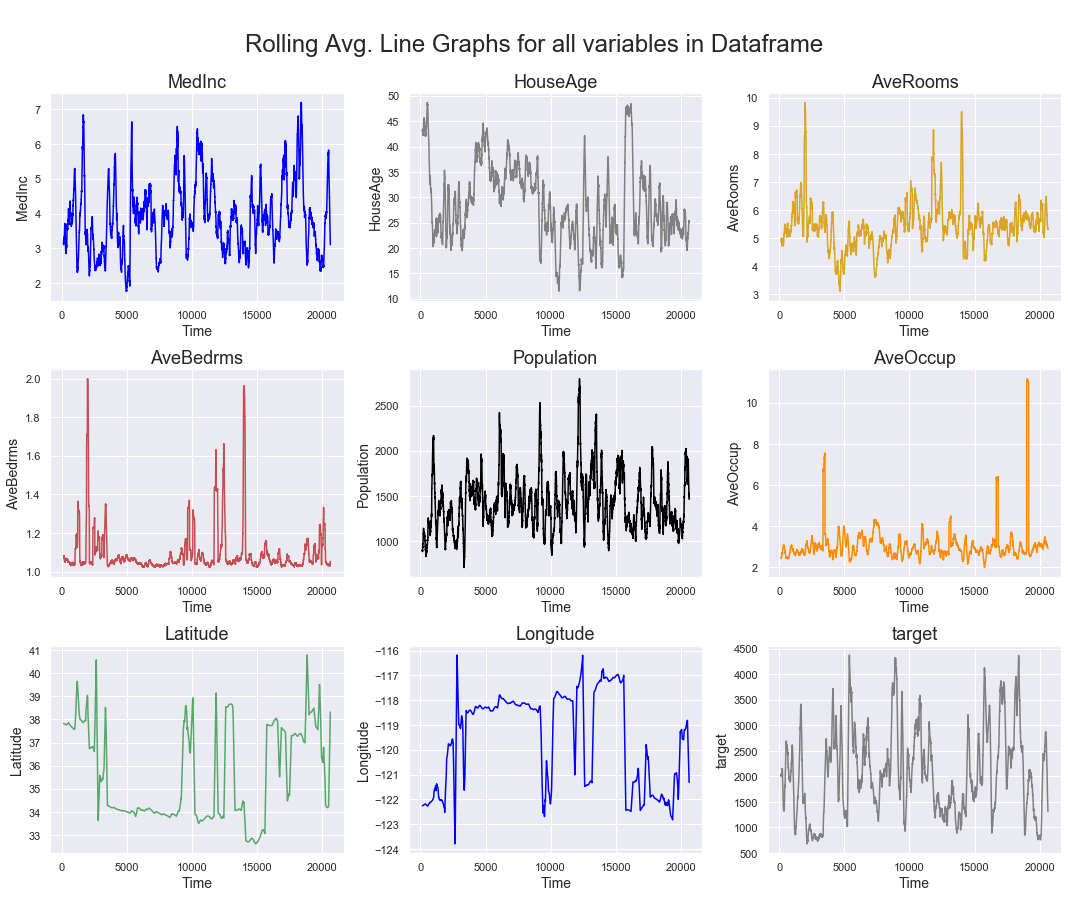

In [79]:
gen_linecharts_rolling(df,150,3)